In [318]:
%pip install -U scikit-learn


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [319]:
import tensorflow as tf
import os

gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[]

In [320]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [321]:
import cv2
import imghdr

In [322]:
data_dir = 'data'
test_dir = 'test_images'
classes = ['Bulging Eyes', 'Cataracts', 'Crossed Eyes', 'Glaucoma', 'Healthy Eyes', 'Uveitits']

In [323]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [324]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [325]:
for image in os.listdir(test_dir):
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [326]:
tf.data.Dataset

import numpy as np
from matplotlib import pyplot as plt



In [327]:
data = tf.keras.utils.image_dataset_from_directory('data')
#tests = tf.keras.utils.image_dataset_from_directory('test_images')

Found 546 files belonging to 6 classes.


In [328]:
data_iterator = data.as_numpy_iterator()

In [329]:
# Get another batch from the iterator 
batch = data_iterator.next()

In [330]:
# images Represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [331]:
# Class 1 = Sad 
# Class 0 = happy
batch[1]

array([2, 2, 2, 4, 1, 2, 4, 3, 5, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 0, 1, 3,
       1, 0, 5, 3, 2, 5, 4, 0, 3, 0])

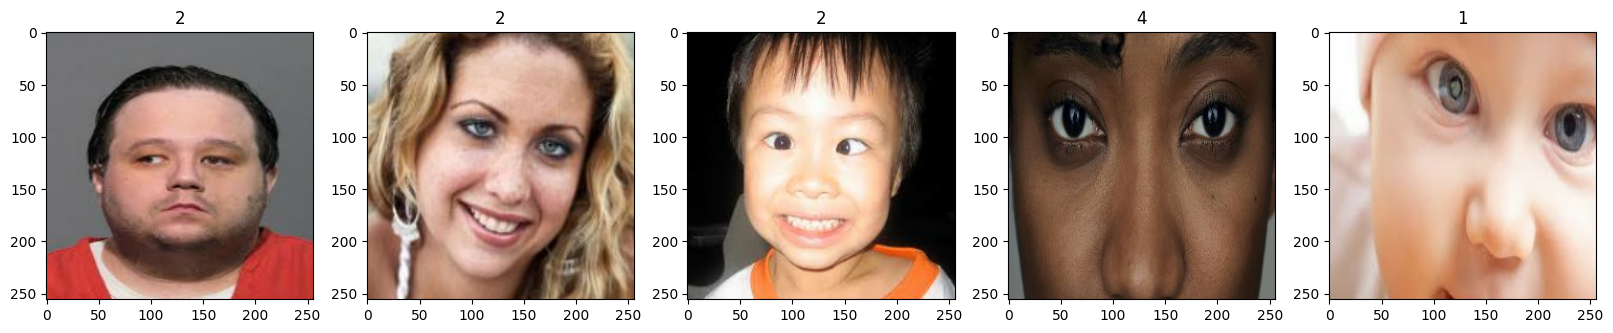

In [332]:
fig, ax = plt.subplots(ncols = 5, figsize =(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [333]:
scaled = batch[0] / 255

In [334]:
data = data.map(lambda x, y: (x / 255, y))

In [335]:
scaled_iterator = data.as_numpy_iterator()

In [336]:
batch = scaled_iterator.next()

In [337]:
batch[0].max()

1.0

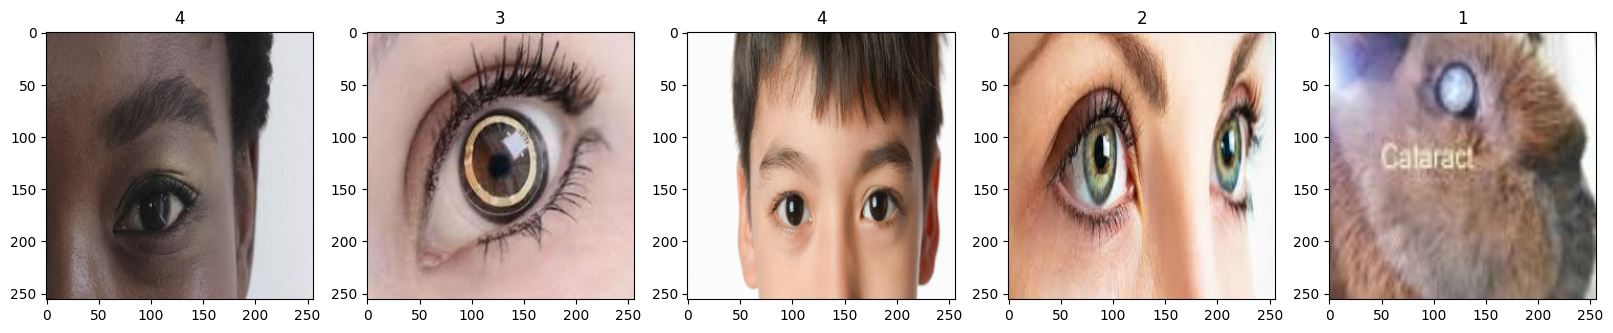

In [338]:
fig, ax = plt.subplots(ncols = 5, figsize =(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [339]:
len(data)


18

In [356]:
train_size = int(len(data) * .7)
val_size = int(len(data) * .2)
test_size = int(len(data) * .1) + 2

train_size 

12

In [357]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


In [420]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout

model = Sequential()


model.add(Conv2D(16, (3,3), 2, padding = 'same', activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Conv2D(32, (3,3), 2, padding = 'same', activation = 'relu', ))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Conv2D(64, (3,3), 2, padding = 'same', activation = 'relu', ))
model.add(Conv2D(64, (3,3), 2, padding = 'same', activation = 'relu', ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
#model.add(Dropout(.2))
model.add(Dense(128, activation = 'relu'))
#model.add(Dropout(.2))
model.add(Dense(6, activation = 'softmax'))


model.compile('adam', loss = tf.losses.sparse_categorical_crossentropy, metrics =['accuracy'])

model.summary()

logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)
hist = model.fit(train, epochs = 100, validation_data = val)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_73 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_74 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_67 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_75 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 conv2d_76 (Conv2D)          (None, 4, 4, 64)        

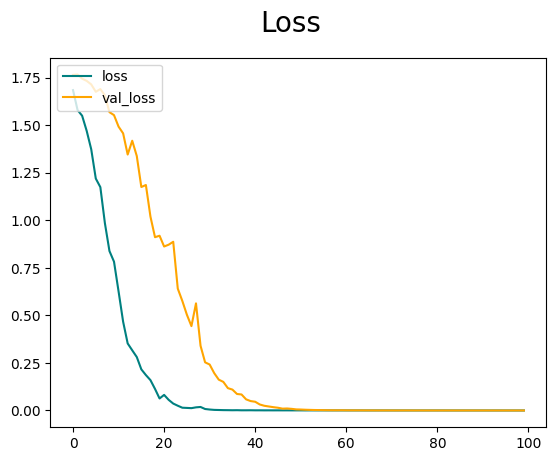

In [421]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

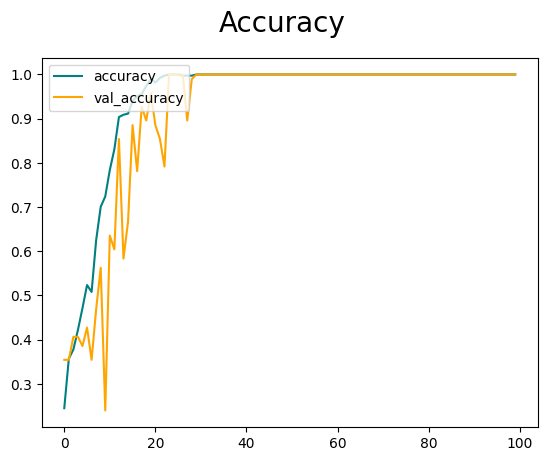

In [422]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

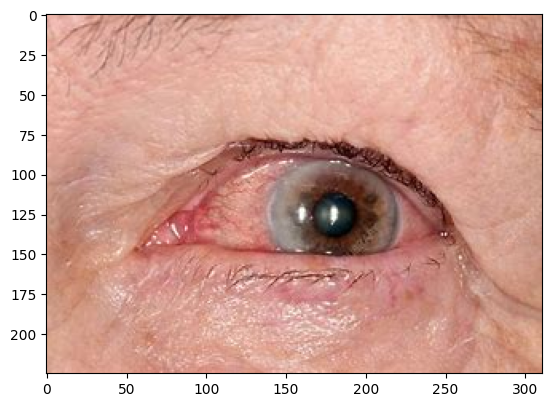

In [345]:
#You can test the NN here by passing in an image
img = cv2.imread('C:/Users/Ethan/OneDrive/Documents/GitHub/EyeCU/test_images/glaucomatest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

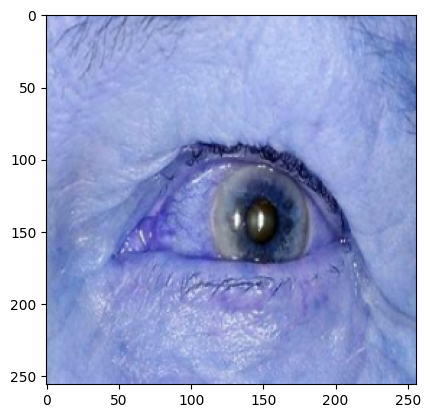

In [346]:
#Have to resize the image before we pass it into the NN
resize = tf.image.resize(img, (256, 256))
img_array = tf.keras.utils.img_to_array(resize)
img_array = tf.expand_dims(resize, 0) # Create a batch

plt.imshow(resize.numpy().astype(int))
plt.show()

In [347]:

preds = np.round(model.predict(batch[0]), 1)
#r = np.round(preds,5).argmax()
#r
for i in range(6):
    for j in range(6):
        if preds[i][j] == 1:
            print('This image belongs to: ' + classes[j])
            
    

1/1 [==============================] - 1s 624ms/step
This image belongs to: Healthy Eyes
This image belongs to: Glaucoma
This image belongs to: Healthy Eyes
This image belongs to: Crossed Eyes
This image belongs to: Cataracts
This image belongs to: Cataracts


In [348]:
pred = np.round(preds,6).argmax()


print(preds[0])

pred_labels = []

for i in range(6):
    r = np.round(preds[i],0).argmax()
    print(r)
    if r ==0 : pred_labels.append("Bulging Eyes")
    elif r ==1: pred_labels.append("Cataracts")
    elif r ==2: pred_labels.append("Crossed Eyes")
    elif r ==3: pred_labels.append("Glaucoma")
    elif r ==4: pred_labels.append("Healthy Eyes")
    elif r ==5: pred_labels.append("Uveitis")

[0. 0. 0. 0. 1. 0.]
4
3
4
2
1
1


(6, 256, 256, 3)


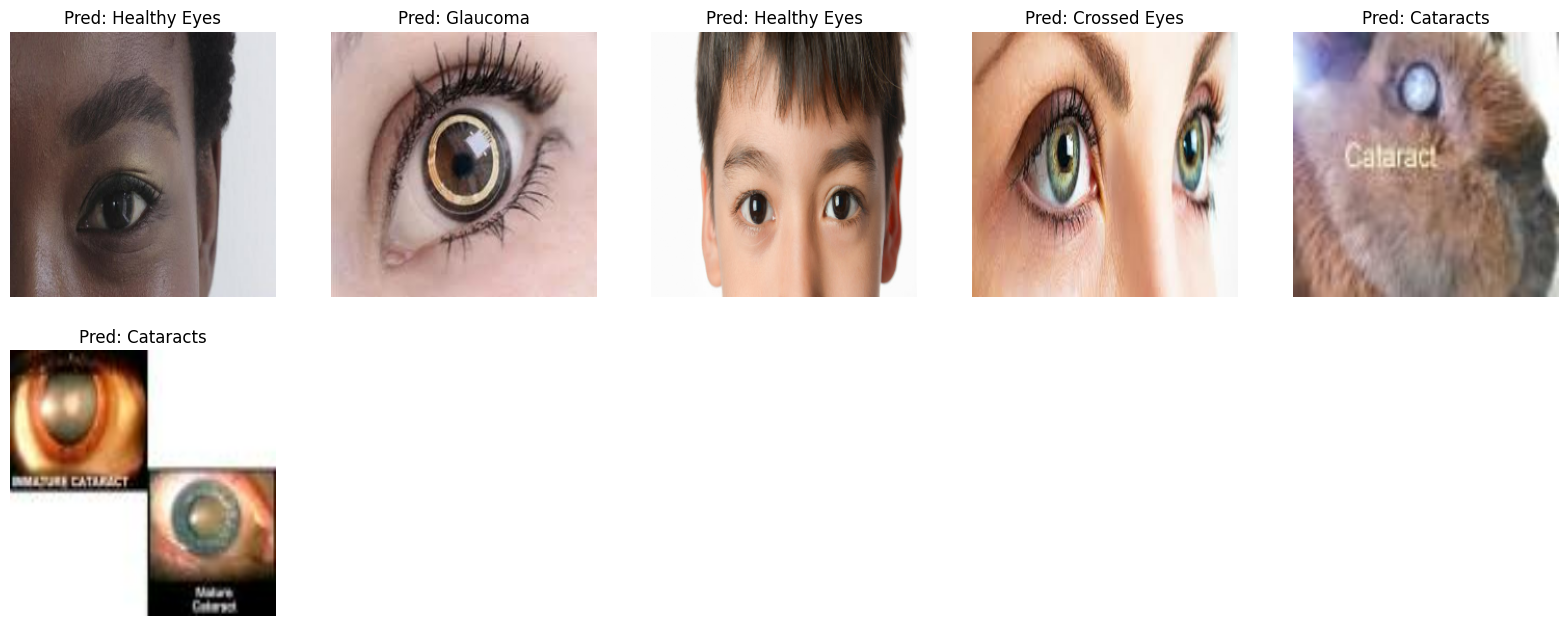

In [349]:
images = batch[0][:6]

print(images.shape)

fig = plt.figure(figsize=(20, 20))
for m in range(1, 7):
    img = images[m-1].reshape([256, 256, 3])
    fig.add_subplot(5, 5, m)
    plt.imshow(img)
    plt.title("Pred: " + pred_labels[m-1])
    plt.axis('off')
plt.show()

In [376]:

img_array = tf.keras.utils.img_to_array(resize)
img_array = tf.expand_dims(resize, 0) # Create a batch

predictions = (model.predict(img_array))
print(predictions)
score = tf.nn.softmax(predictions)
print(score)

#print(
  #  "This image most likely belongs to {} with a {:.2f} percent confidence."
 #   .format(pred_labels[np.argmax(score)], 100 * np.max(score))
#)
np.argmax(score)
score

1/1 [==============================] - 0s 70ms/step
[[0. 0. 0. 1. 0. 0.]]
tf.Tensor([[0.12956253 0.12956253 0.12956253 0.35218745 0.12956253 0.12956253]], shape=(1, 6), dtype=float32)


<tf.Tensor: shape=(1, 6), dtype=float32, numpy=
array([[0.12956253, 0.12956253, 0.12956253, 0.35218745, 0.12956253,
        0.12956253]], dtype=float32)>

In [351]:
%pip install gradio

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [427]:
def predict_image(img):
  img_array2 = tf.keras.utils.img_to_array(img)
  img_array2 = tf.expand_dims(img, 0)
  prediction = np.round(model.predict(img_array2))
  for i in range(6):
    for j in range(6):
      if prediction[i][j] == 1:
        return classes[j]

In [428]:
import gradio as gr
image = gr.inputs.Image(shape=(256,256))
label = gr.outputs.Label(num_top_classes=6)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

c:\Users\Ethan\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
c:\Users\Ethan\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
c:\Users\Ethan\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
c:\Users\Ethan\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 125ms/step
Keyboard interruption in main thread... closing server.
